In [ ]:
# Imports

## For AOV

import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

# For Displaying and Saving Results

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42) # the answer to the universe

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = {
    'training':datasets.MNIST('mnist-monkfromearth/dataset/training/', download=True, train=True, transform=transform),
    'testing':datasets.MNIST('mnist-monkfromearth/dataset/testing/', download=True, train=False, transform=transform)
}

dataloader = {
    'training':torch.utils.data.DataLoader(dataset['training'], batch_size=64, shuffle=True),
    'testing':torch.utils.data.DataLoader(dataset['testing'], batch_size=64, shuffle=True)
}

In [ ]:
# For showing images

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [ ]:
# Getting a sample image

images, labels = next(iter(dataloader['training']))
imshow(images[0])

In [41]:
# Creating a model, criterion

model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 10)
)

criterion = nn.CrossEntropyLoss()

torch.save(model.state_dict(), 'mnist-monkfromearth/model.pth')

In [42]:
learning_rates = np.arange(0.001, 0.009, step=0.002, dtype=np.float64)

total = len(learning_rates)

data = pd.DataFrame(columns=['Learning Rate', 'E1','E2','E3','E4','E5','E6','E7','E8','E9','E10'], index=range(1,total+1))

Learning Rate: 0.001
Epoch: 0, Training Loss: 2.2128702297902056, Test Loss: 2.061027703771166, Accuracy: 0.5143312215805054
Epoch: 1, Training Loss: 1.8917322233795866, Test Loss: 1.5836326483708278, Accuracy: 0.7041202187538147
Epoch: 2, Training Loss: 1.4092595985195022, Test Loss: 1.0863445260722167, Accuracy: 0.7875199317932129
Epoch: 3, Training Loss: 1.0424760024684834, Test Loss: 0.8045377051754362, Accuracy: 0.8187699317932129
Epoch: 4, Training Loss: 0.8407622813415934, Test Loss: 0.6548922665559562, Accuracy: 0.8431528806686401
Epoch: 5, Training Loss: 0.7213033737340716, Test Loss: 0.5652562051442018, Accuracy: 0.856488823890686
Epoch: 6, Training Loss: 0.6439547953066795, Test Loss: 0.5046479690606427, Accuracy: 0.8722133636474609
Epoch: 7, Training Loss: 0.5906103194268273, Test Loss: 0.4641996033632072, Accuracy: 0.8791799545288086
Epoch: 8, Training Loss: 0.5484012807927915, Test Loss: 0.43195258508062667, Accuracy: 0.8848527073860168
Epoch: 9, Training Loss: 0.51974526

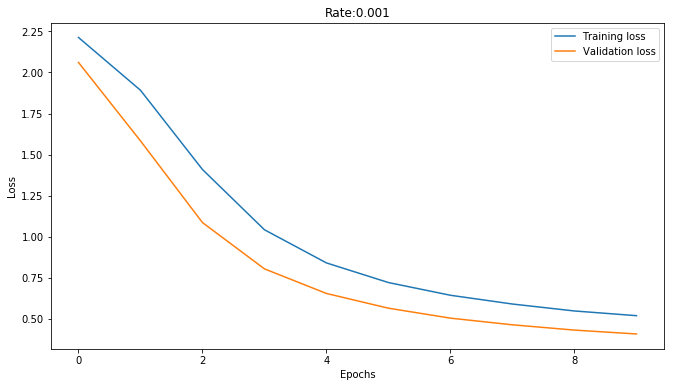

Learning Rate: 0.003
Epoch: 0, Training Loss: 1.8434160469945815, Test Loss: 1.0937256532110227, Accuracy: 0.7715963125228882
Epoch: 1, Training Loss: 0.8747630345224063, Test Loss: 0.5686235731574381, Accuracy: 0.8535031676292419
Epoch: 2, Training Loss: 0.5964763188031691, Test Loss: 0.43603313681046674, Accuracy: 0.8838574886322021
Epoch: 3, Training Loss: 0.4958347321064996, Test Loss: 0.3760822301457642, Accuracy: 0.8954020738601685
Epoch: 4, Training Loss: 0.443001950568736, Test Loss: 0.34148395469613896, Accuracy: 0.9023686051368713
Epoch: 5, Training Loss: 0.40884545053055543, Test Loss: 0.3205581019828274, Accuracy: 0.9083399772644043
Epoch: 6, Training Loss: 0.38151913250623737, Test Loss: 0.30150988764443976, Accuracy: 0.9142118096351624
Epoch: 7, Training Loss: 0.3616584862854435, Test Loss: 0.28656448680124463, Accuracy: 0.9206807613372803
Epoch: 8, Training Loss: 0.3452508598407194, Test Loss: 0.2742805172493503, Accuracy: 0.9224721193313599
Epoch: 9, Training Loss: 0.32

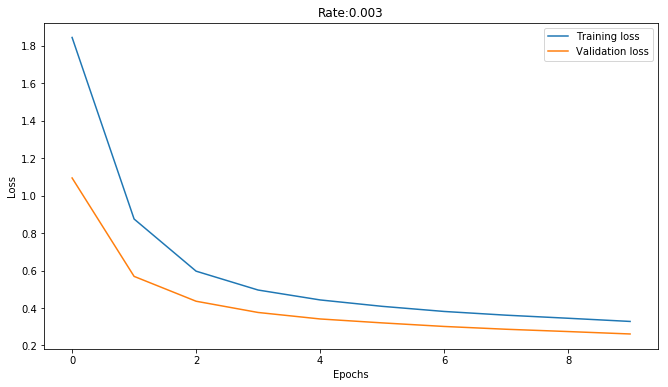

Learning Rate: 0.005
Epoch: 0, Training Loss: 1.4835152189487588, Test Loss: 0.6588446564355473, Accuracy: 0.8446456789970398
Epoch: 1, Training Loss: 0.6085476234142206, Test Loss: 0.41279141234744127, Accuracy: 0.8891321420669556
Epoch: 2, Training Loss: 0.46096199784261077, Test Loss: 0.3491934927026178, Accuracy: 0.9016719460487366
Epoch: 3, Training Loss: 0.39995244691875187, Test Loss: 0.31108081046563046, Accuracy: 0.9103304147720337
Epoch: 4, Training Loss: 0.36422849986662487, Test Loss: 0.2824354553773145, Accuracy: 0.9210788011550903
Epoch: 5, Training Loss: 0.3361825949109312, Test Loss: 0.2635532014878692, Accuracy: 0.9258558750152588
Epoch: 6, Training Loss: 0.3130624907484441, Test Loss: 0.24606459711197834, Accuracy: 0.9297372698783875
Epoch: 7, Training Loss: 0.2936571581976246, Test Loss: 0.2321339600310204, Accuracy: 0.9328224658966064
Epoch: 8, Training Loss: 0.27685515631014096, Test Loss: 0.22004176970500094, Accuracy: 0.9349124431610107
Epoch: 9, Training Loss: 0

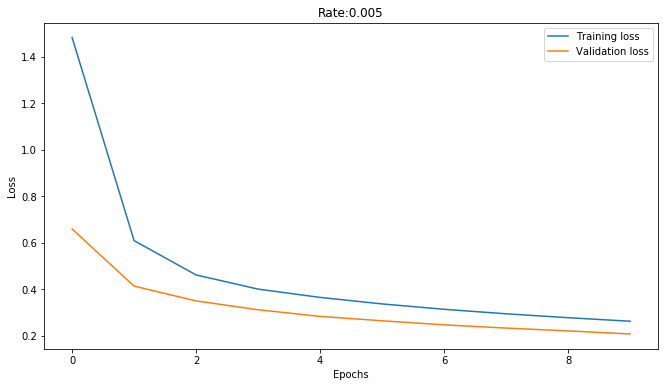

Learning Rate: 0.007
Epoch: 0, Training Loss: 1.2596303909889925, Test Loss: 0.5155854836391036, Accuracy: 0.8651472926139832
Epoch: 1, Training Loss: 0.5067293976129753, Test Loss: 0.35791225285287115, Accuracy: 0.8986862897872925
Epoch: 2, Training Loss: 0.402612994665276, Test Loss: 0.3045642020501149, Accuracy: 0.9142118096351624
Epoch: 3, Training Loss: 0.35398049725652503, Test Loss: 0.2722185370838566, Accuracy: 0.9221735596656799
Epoch: 4, Training Loss: 0.32205486732886546, Test Loss: 0.25206738881244783, Accuracy: 0.9255573153495789
Epoch: 5, Training Loss: 0.2909700892595594, Test Loss: 0.22643186835346707, Accuracy: 0.9343152642250061
Epoch: 6, Training Loss: 0.2687038482824114, Test Loss: 0.20924478551005102, Accuracy: 0.9379976391792297
Epoch: 7, Training Loss: 0.24879822429658763, Test Loss: 0.2008384165300685, Accuracy: 0.9397889971733093
Epoch: 8, Training Loss: 0.23314766156107886, Test Loss: 0.18205983341214763, Accuracy: 0.9453622698783875
Epoch: 9, Training Loss: 0

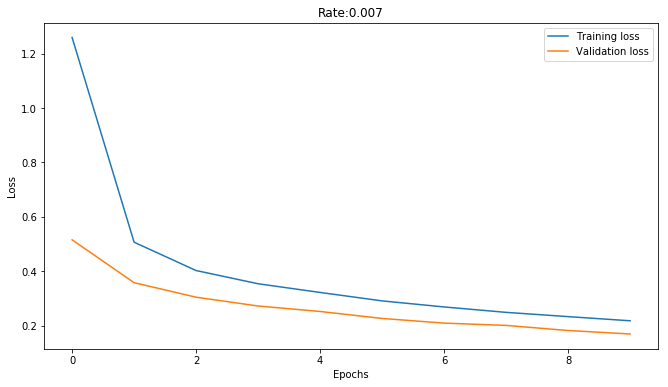

In [43]:
steps = 0

for rate in learning_rates:
    model.load_state_dict(torch.load('mnist-monkfromearth/model.pth'))
    
    optimizer = optim.SGD(model.parameters(), lr=rate)
    
    data.iloc[steps][0] = rate
    
    print("Learning Rate: {}".format(rate))
    
    training_losses = []
    test_losses = []
    
    epochs = 10
    for e in range(epochs):
        training_loss = 0
        test_loss = 0
        accuracy = 0
        
        for images, labels in dataloader['training']:
            images = images.view(images.shape[0], -1)
            scores = model(images)
            optimizer.zero_grad()
            loss = criterion(scores, labels)
            loss.backward()
            optimizer.step()
            training_loss += loss.item()
        else:
            model.eval()
            with torch.no_grad():
                for images, labels in dataloader['testing']:
                    images = images.view(images.shape[0], -1)
                    scores = model(images)
                    loss = criterion(scores, labels)
                    test_loss += loss.item()
                    ps = torch.exp(scores)
                    top_p, top_class = ps.topk(1, dim=1)
                    equality = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equality.type(torch.FloatTensor))
            current_training_loss = training_loss / len(dataloader['training'])
            current_test_loss = test_loss / len(dataloader['testing'])
            current_accuracy = accuracy / len(dataloader['testing']) 
        model.train()
        training_losses.append(current_training_loss)
        test_losses.append(current_test_loss)
        data.iloc[steps][e + 1] = current_accuracy.numpy().tolist()
        print("Epoch: {}, Training Loss: {}, Test Loss: {}, Accuracy: {}".format(e, current_training_loss, current_test_loss, current_accuracy))
    
    print()
    
    steps += 1
    
    fig = plt.figure(figsize=(11,6))
    plt.plot(training_losses, label='Training loss')
    plt.plot(test_losses, label='Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("Rate:{}".format(rate))
    plt.legend()
    plt.show()
    fig.savefig("mnist-monkfromearth/results/LearningRate_{}.png".format(rate))

In [45]:
data.to_csv("mnist-monkfromearth/results/result.csv")

In [44]:
data

,Learning Rate,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,Accuracy
1,0.001,0.514331,0.70412,0.78752,0.81877,0.843153,0.856489,0.872213,0.87918,0.884853,0.889033,NaN
2,0.003,0.771596,0.853503,0.883857,0.895402,0.902369,0.90834,0.914212,0.920681,0.922472,0.925756,NaN
3,0.005,0.844646,0.889132,0.901672,0.91033,0.921079,0.925856,0.929737,0.932822,0.934912,0.939192,NaN
4,0.007,0.865147,0.898686,0.914212,0.922174,0.925557,0.934315,0.937998,0.939789,0.945362,0.949343,NaN
